             municipio total 5 estrella 4 estrella 3 estrella 2 estrella  \
0              bolanos    28          0          0          0          0   
1          chimaltitan     8          0          0          0          0   
2             colotlan   138          0         62          0          0   
3             huejucar    41          0          0          0          0   
4  huejuquilla el alto    77          0          0         60          0   

  1 estrella sin catego   año region                        geometry  
0          8         20  2013  norte  POINT (601661.116 2400304.224)  
1          0          8  2013  norte  POINT (651810.204 2413406.437)  
2         76          0  2013  norte  POINT (672613.474 2453585.666)  
3         41          0  2013  norte  POINT (676260.780 2463955.231)  
4          0         17  2013  norte  POINT (616464.260 2513807.863)  


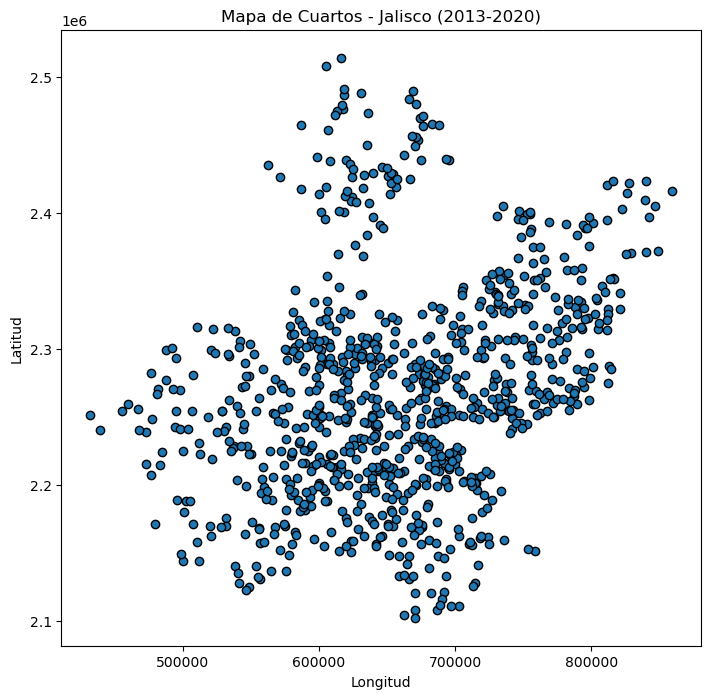

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga del shapefile (asegúrate que todos los archivos están en el mismo directorio)
gdf = gpd.read_file("df_cuartos.shp")

# Mostrar las primeras filas
print(gdf.head())

# Visualizar el mapa
gdf.plot(figsize=(10, 8), edgecolor='black')
plt.title("Mapa de Cuartos - Jalisco (2013-2020)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [9]:
# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Contar frecuencia de valores únicos en una columna
print(gdf.value_counts())

municipio            total  5 estrella  4 estrella  3 estrella  2 estrella  1 estrella  sin catego  año   region     geometry                      
acatic               66     0           0           0           0           0           66          2017  altos sur  POINT (722117.380 2304106.470)    1
sayula               151    33          59          10          22          18          9           2013  sur        POINT (639062.695 2201409.549)    1
santa maria del oro  11     0           0           0           0           0           11          2018  sureste    POINT (725237.218 2156688.096)    1
                                                                                                    2019  sureste    POINT (718917.406 2162094.755)    1
                                                                                                    2020  sureste    POINT (736286.306 2159611.809)    1
                                                                                       

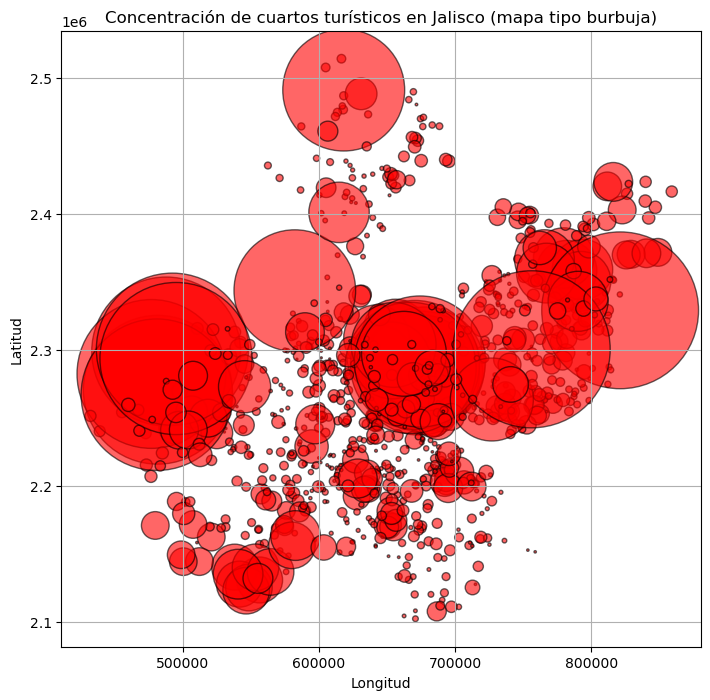

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")
# 
# Convertir columna a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Graficar burbujas
fig, ax = plt.subplots(figsize=(10, 8))

gdf.plot(
    ax=ax,
    color='red',
    markersize=gdf['total'] * 0.5,
    alpha=0.6,
    edgecolor='black'
)

plt.title("Concentración de cuartos turísticos en Jalisco (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


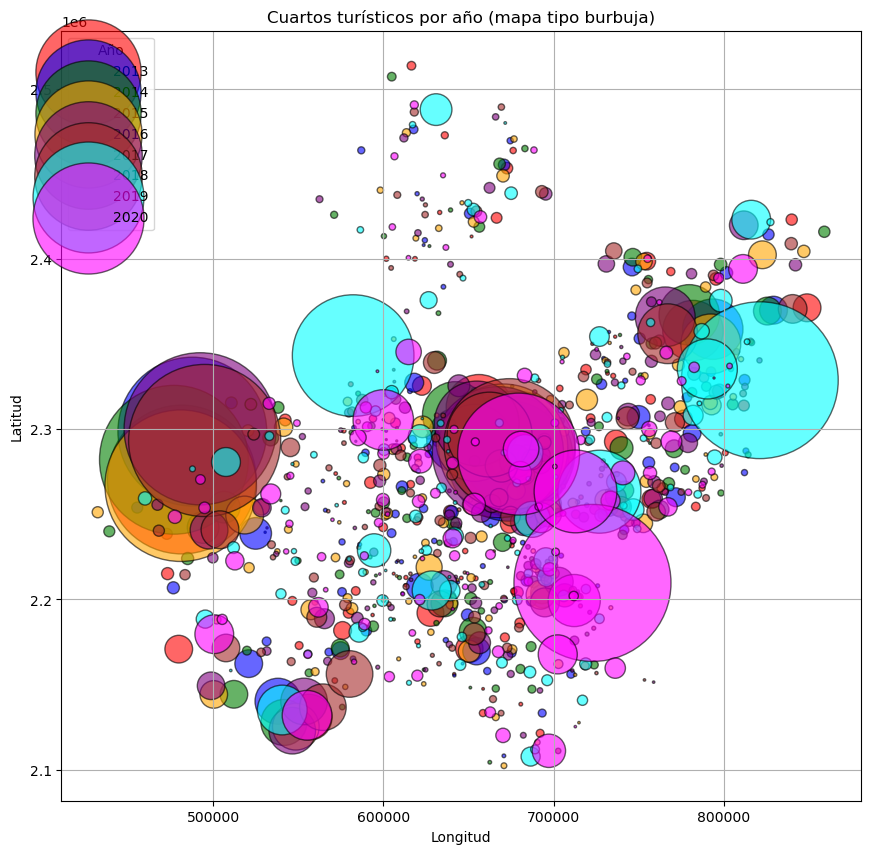

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Crear lista de colores (puedes ampliar si tienes más años)
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']

# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i % len(colores)],
        alpha=0.6,
        label=str(año),
        edgecolor='black'
    )

plt.title("Cuartos turísticos por año (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


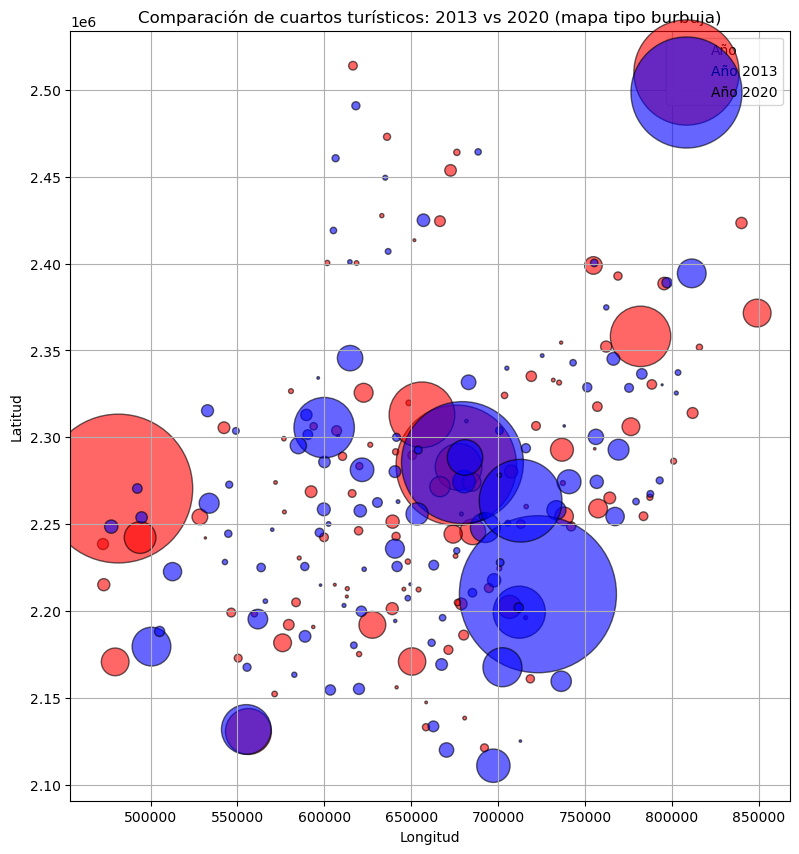

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_cuartos.shp")

# Convertir columna 'total' a tipo numérico
gdf['total'] = pd.to_numeric(gdf['total'], errors='coerce')

# Filtrar solo los años 2013 y 2020
gdf = gdf[gdf['año'].isin([2013, 2020])]

# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Colores para 2013 y 2020
colores = ['red', 'blue']

# Agrupar por año y graficar
for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total'] * 0.5,
        color=colores[i],
        alpha=0.6,
        label=f"Año {año}",
        edgecolor='black'
    )

plt.title("Comparación de cuartos turísticos: 2013 vs 2020 (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()
